In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 795 kB/s 
     |████████████████████████████████| 6.4 MB 8.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Importing libraries and dependencies

In [2]:
# yfinance is where we will pull our data from
import yfinance as yf
# pandas for dealing with DataFrames
import pandas as pd
# numpy for using mathematical functions
import numpy as np
# matplotlib for visualization
import matplotlib.pyplot as plt
# Turning off the warnings
# pd.options.mode.chained_assignment = None
# request library
import requests

## Pulling data for 1 ticker using yfinance

### 1. Getting used to the syntax for downloading data from yfinance

In [3]:
# pulling data of APPL stock from start of 2010 till now
# if we do not put in the end date then by default it would be today's date
Apple = yf.download('AAPL', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Lets see what data are we getting for APPL stock
# As you can see that the start date in the data is January 04 not 01 it is because of the weekend holidays when the market was close
Apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544685,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556004,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451720,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439795,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.482606,447610800
...,...,...,...,...,...,...
2022-04-07,171.160004,173.360001,169.850006,172.139999,172.139999,77594700
2022-04-08,171.779999,171.779999,169.199997,170.089996,170.089996,76515900
2022-04-11,168.710007,169.029999,165.500000,165.750000,165.750000,72246700


In [5]:
# reading tickers_spy.csv
tickers = pd.read_csv("tickers_spy.csv")

In [6]:
tickers = tickers.values.tolist()

In [7]:
tickers

[['MMM'],
 ['AOS'],
 ['ABT'],
 ['ABBV'],
 ['ABMD'],
 ['ACN'],
 ['ATVI'],
 ['ADM'],
 ['ADBE'],
 ['ADP'],
 ['AAP'],
 ['AES'],
 ['AFL'],
 ['A'],
 ['AIG'],
 ['APD'],
 ['AKAM'],
 ['ALK'],
 ['ALB'],
 ['ARE'],
 ['ALGN'],
 ['ALLE'],
 ['LNT'],
 ['ALL'],
 ['GOOGL'],
 ['GOOG'],
 ['MO'],
 ['AMZN'],
 ['AMCR'],
 ['AMD'],
 ['AEE'],
 ['AAL'],
 ['AEP'],
 ['AXP'],
 ['AMT'],
 ['AWK'],
 ['AMP'],
 ['ABC'],
 ['AME'],
 ['AMGN'],
 ['APH'],
 ['ADI'],
 ['ANSS'],
 ['ANTM'],
 ['AON'],
 ['APA'],
 ['AAPL'],
 ['AMAT'],
 ['APTV'],
 ['ANET'],
 ['AIZ'],
 ['T'],
 ['ATO'],
 ['ADSK'],
 ['AZO'],
 ['AVB'],
 ['AVY'],
 ['BKR'],
 ['BLL'],
 ['BAC'],
 ['BBWI'],
 ['BAX'],
 ['BDX'],
 ['WRB'],
 ['BRK-B'],
 ['BBY'],
 ['BIO'],
 ['TECH'],
 ['BIIB'],
 ['BLK'],
 ['BK'],
 ['BA'],
 ['BKNG'],
 ['BWA'],
 ['BXP'],
 ['BSX'],
 ['BMY'],
 ['AVGO'],
 ['BR'],
 ['BRO'],
 ['BF-B'],
 ['CHRW'],
 ['CDNS'],
 ['CZR'],
 ['CPT'],
 ['CPB'],
 ['COF'],
 ['CAH'],
 ['KMX'],
 ['CCL'],
 ['CARR'],
 ['CTLT'],
 ['CAT'],
 ['CBOE'],
 ['CBRE'],
 ['CDW'],
 ['CE'],
 ['CN

In [8]:
flat_tickers = [item for sublist in tickers for item in sublist]

In [9]:
flat_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL

In [10]:
stocks = yf.download(flat_tickers, start = '2010-01-01')

[*********************100%***********************]  504 of 504 completed


In [11]:
stocks

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2009-12-31         NaN        NaN         NaN         NaN         NaN   
2010-01-04   20.434929   4.496876   38.222973    6.544687         NaN   
2010-01-05   20.212959   5.005957   37.995796    6.556002         NaN   
2010-01-06   20.141132   4.798555   38.327084    6.451721         NaN   
2010-01-07   20.115025   4.939965   38.317631    6.439792         NaN   
...                ...        ...         ...         ...         ...   
2022-04-07  135.929993  16.950001  217.580002  172.139999  173.279999   
2022-04-08  134.869995  16.590000  225.740005  170.089996  174.960007   
2022-04-11  131.259995  16.969999  220.970001  165.750000  169.830002   
2022-04-12  125.389999  17.129999  221.880005  167.660004  167.309998   
2022-04-13  128.380005  18.881001  220.535004  170.891205  158.824997   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2009-12-31         NaN         NaN         NaN         NaN         NaN  ...   
2010-01-04   22.101795    8.740000   19.778837   33.334290   37.090000  ...   
2010-01-05   21.944103    8.530000   19.619041   33.540314   37.700001  ...   
2010-01-06   21.736616    8.400000   19.727999   33.896870   37.619999  ...   
2010-01-07   21.388039    8.400000   19.891426   33.865170   36.889999  ...   
...                ...         ...         ...         ...         ...  ...   
2022-04-07  162.919998  317.519989  123.370003  341.769989  452.720001  ...   
2022-04-08  165.440002  314.529999  123.250000  338.920013  445.339996  ...   
2022-04-11  162.649994  299.760010  120.040001  327.269989  434.440002  ...   
2022-04-12  162.619995  299.640015  118.389999  326.730011  426.769989  ...   
2022-04-13  162.684998  306.579987  119.550003  325.549988  433.225006  ...   

               Volume                                                          \
                 WYNN        XEL         XOM       XRAY        XYL        YUM   
Date                                                                            
2009-12-31        NaN        NaN         NaN        NaN        NaN        NaN   
2010-01-04  4741400.0  2670400.0  27809100.0  1051400.0        NaN  2962274.0   
2010-01-05  5644300.0  4321400.0  30174700.0   763400.0        NaN  3298757.0   
2010-01-06  2738800.0  2164500.0  35044700.0  1595100.0        NaN  4178981.0   
2010-01-07  2388500.0  3041700.0  27192100.0  1096100.0        NaN  2452472.0   
...               ...        ...         ...        ...        ...        ...   
2022-04-07  3437600.0  3228700.0  26122000.0  1240400.0  1153100.0  2008900.0   
2022-04-08  2418800.0  2115100.0  24863600.0  1252100.0  1363500.0  1743200.0   
2022-04-11  2483800.0  2752300.0  21800100.0  1728600.0  1076700.0  2199600.0   
2022-04-12  1956300.0  2872300.0  22444200.0  1266300.0  1172900.0  2396300.0   
2022-04-13  1733399.0  1528865.0  15422726.0   628311.0   642151.0  1075217.0   

                                                        
                  ZBH      ZBRA        ZION        ZTS  
Date                                                    
2009-12-31        NaN       NaN         NaN        NaN  
2010-01-04   805872.0  168800.0   3974600.0        NaN  
2010-01-05  1769643.0  168800.0   5605500.0        NaN  
2010-01-06  1315619.0  385300.0  12615200.0        NaN  
2010-01-07  1734005.0  183600.0  24716800.0        NaN  
...               ...       ...         ...        ...  
2022-04-07  1800200.0  464500.0   1093500.0  2781400.0  
2022-04-08  1107600.0  387600.0    889300.0  2455500.0  
2022-04-11   841800.0  249100.0    939800.0  2252200.0  
2022-04-12  1216100.0  276100.0    816600.0  1746500.0  
2022-04

In [12]:
# saving stocks data to csv
stocks.to_csv("stocks_spy_data.csv")

In [13]:
stocks = pd.read_csv("stocks_spy_data.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [14]:
stocks.loc[:,'Adj Close']

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,20.434929,4.496876,38.222973,6.544687,NaN,22.101795,8.740000,19.778837,33.334290,37.090000,...,41.963718,13.784528,43.185631,32.624146,NaN,19.900911,53.434978,28.670000,11.376087,NaN
2010-01-05,20.212959,5.005957,37.995796,6.556002,NaN,21.944103,8.530000,19.619041,33.540314,37.700001,...,44.515926,13.621039,43.354259,32.236298,NaN,19.832848,55.126534,28.620001,11.777194,NaN
2010-01-06,20.141132,4.798555,38.327084,6.451721,NaN,21.736616,8.400000,19.727999,33.896870,37.619999,...,43.932011,13.647200,43.728962,32.448689,NaN,19.691063,55.108730,28.400000,12.801299,NaN
2010-01-07,20.115025,4.939965,38.317631,6.439792,NaN,21.388039,8.400000,19.891426,33.865170,36.889999,...,44.870213,13.588348,43.591572,32.873466,NaN,19.685392,56.372936,27.690001,14.235044,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,135.929993,16.950001,217.580002,172.139999,173.279999,162.919998,317.519989,123.370003,341.769989,452.720001,...,73.970001,74.570000,85.050003,48.070000,86.720001,120.400002,129.910004,418.399994,63.180000,197.929993
2022-04-08,134.869995,16.590000,225.740005,170.089996,174.960007,165.440002,314.529999,123.250000,338.920013,445.339996,...,72.230003,74.820000,86.839996,48.049999,86.669998,119.169998,129.619995,415.630005,63.889999,200.089996
2022-04-11,131.259995,16.969999,220.970001,165.750000,169.830002,162.649994,299.760010,120.040001,327.269989,434.440002,...,71.290001,74.360001,83.849998,48.480000,85.730003,118.309998,126.900002,408.700012,64.230003,192.500000


In [15]:
# saving stocks data to csv
stocks.to_csv("stocks_spy_adj_close.csv")

In [16]:
stocks.describe()

Adj Close                                                      \
                 A          AAL          AAP         AAPL         ABBV   
count  3092.000000  3092.000000  3092.000000  3092.000000  2338.000000   
mean     56.447853    25.856676   122.092169    43.867838    65.695573   
std      36.510556    14.478052    47.670359    42.643988    28.425326   
min      17.607986     3.770966    37.068142     5.873126    23.022469   
25%      29.523072    11.895040    77.223204    16.368112    43.892550   
50%      39.675125    25.018261   131.276260    26.392119    58.168001   
75%      69.624477    38.588012   154.084446    49.513954    81.113579   
max     178.821518    56.988728   239.903305   181.778397   174.960007   

                                                                        ...  \
               ABC         ABMD          ABT          ACN         ADBE  ...   
count  3092.000000  3092.000000  3092.000000  3092.000000  3092.000000  ...   
mean     70.551154   134.703309    51.993203   123.263976   175.691988  ...   
std      29.462159   126.146437    32.429586    84.718900   172.479075  ...   
min      21.388039     7.890000    16.918459    29.126768    22.690001  ...   
25%      39.543098    21.420000    28.182682    60.596582    38.302500  ...   
50%      76.928989    94.950001    39.131676    97.240116    91.985001  ...   
75%      87.270269   261.474998    72.885262   161.099468   267.692505  ...   
max     165.440002   449.750000   140.962799   414.345795   688.369995  ...   

             Volume                                                          \
               WYNN           XEL           XOM          XRAY           XYL   
count  3.092000e+03  3.092000e+03  3.092000e+03  3.092000e+03  2.643000e+03   
mean   2.729168e+06  3.008615e+06  1.729534e+07  1.412338e+06  1.102723e+06   
std    1.989682e+06  1.399094e+06  9.628434e+06  1.066032e+06  6.536599e+05   
min    2.895000e+05  0.000000e+00  3.851300e+06  1.913000e+05  1.846000e+05   
25%    1.573775e+06  2.132150e+06  1.067678e+07  7.887750e+05  7.217000e+05   
50%    2.225150e+06  2.704650e+06  1.445090e+07  1.135400e+06  9.766000e+05   
75%    3.221425e+06  3.486400e+06  2.107328e+07  1.724350e+06  1.333650e+06   
max    2.608880e+07  2.282710e+07  1.180235e+08  2.326880e+07  1.510600e+07   

                                                                             
                YUM           ZBH          ZBRA          ZION           ZTS  
count  3.092000e+03  3.092000e+03  3.092000e+03  3.092000e+03  2.317000e+03  
mean   3.780906e+06  1.471182e+06  3.762053e+05  2.770019e+06  2.988319e+06  
std    2.946807e+06  8.480609e+05  3.684549e+05  1.858014e+06  2.751325e+06  
min    3.404000e+05  2.405050e+05  3.180000e+04  3.126000e+05  4.174000e+05  
25%    1.830725e+06  9.555310e+05  1.974500e+05  1.657325e+06  1.780200e+06  
50%    3.117233e+06  1.265870e+06  3.067500e+05  2.318950e+06  2.417700e+06  
75%    4.805887e+06  1.721645e+06  4.538000e+05  3.273050e+06  3.441500e+06  
max    5.110631e+07  1.276634e+07  1.157870e+07  2.633310e+07  6.678910e+07  

[8 rows x 3024 columns]

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [18]:
# for simple reasons just doing the remaining analysis on the first ten columns, 
# if everything works out then I will do the analysis with all the columns
stocks_ten = stocks.iloc[:,0:10]
stocks_ten

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2009-12-31         NaN        NaN         NaN         NaN         NaN   
2010-01-04   20.434929   4.496876   38.222973    6.544687         NaN   
2010-01-05   20.212959   5.005957   37.995796    6.556002         NaN   
2010-01-06   20.141132   4.798555   38.327084    6.451721         NaN   
2010-01-07   20.115025   4.939965   38.317631    6.439792         NaN   
...                ...        ...         ...         ...         ...   
2022-04-07  135.929993  16.950001  217.580002  172.139999  173.279999   
2022-04-08  134.869995  16.590000  225.740005  170.089996  174.960007   
2022-04-11  131.259995  16.969999  220.970001  165.750000  169.830002   
2022-04-12  125.389999  17.129999  221.880005  167.660004  167.309998   
2022-04-13  128.380005  18.881001  220.535004  170.891205  158.824997   

                                                                        
                   ABC        ABMD         ABT         ACN        ADBE  
Date                                                                    
2009-12-31         NaN         NaN         NaN         NaN         NaN  
2010-01-04   22.101795    8.740000   19.778837   33.334290   37.090000  
2010-01-05   21.944103    8.530000   19.619041   33.540314   37.700001  
2010-01-06   21.736616    8.400000   19.727999   33.896870   37.619999  
2010-01-07   21.388039    8.400000   19.891426   33.865170   36.889999  
...                ...         ...         ...         ...         ...  
2022-04-07  162.919998  317.519989  123.370003  341.769989  452.720001  
2022-04-08  165.440002  314.529999  123.250000  338.920013  445.339996  
2022-04-11  162.649994  299.760010  120.040001  327.269989  434.440002  
2022-04-12  162.619995  299.640015  118.389999  326.730011  426.769989  
2022-04-13  162.684998  306.579987  119.550003  325.549988  433.225006  

[3097 rows x 10 columns]

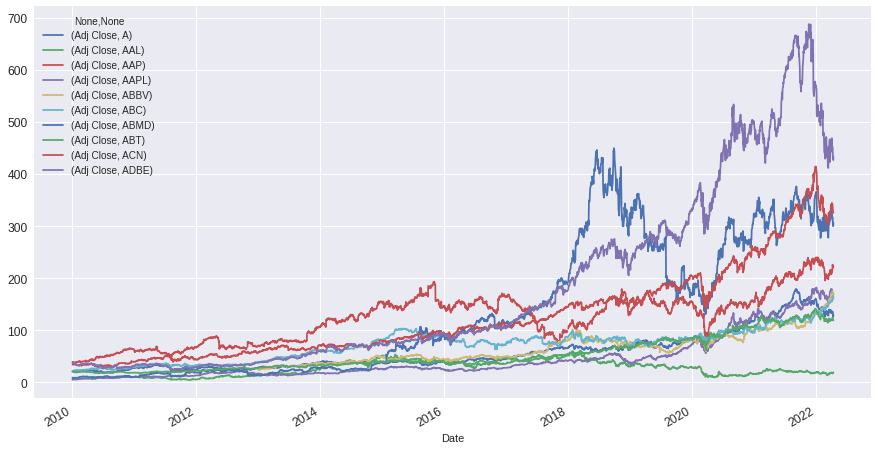

In [19]:
stocks_ten.plot(figsize = (15,8), fontsize = 12)

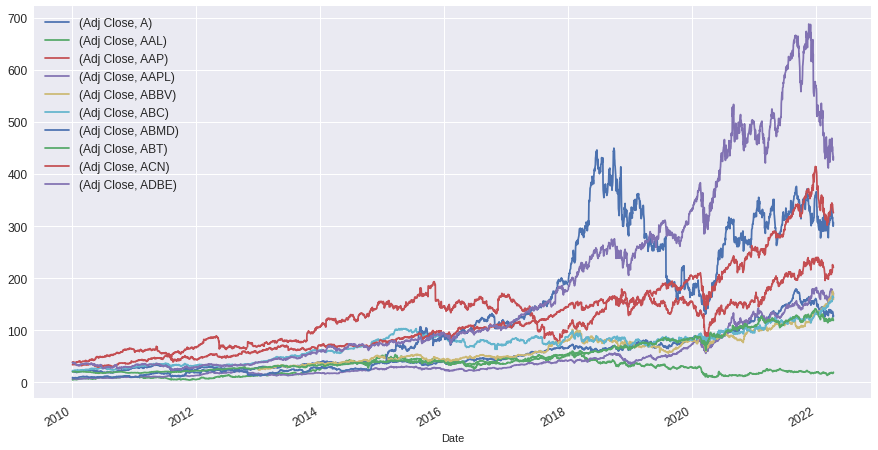

In [20]:
# as you can see the error before the figure is gone
stocks_ten.plot(figsize = (15,8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [21]:
# As you can see all the stocks are not starting from same y value, 
# lets normalize the data and then plot and see the price fluctuations
# we will divide every row by the first row and multiply by 100 to covert it into %
# for example the following code is printing the normalized values of first column
stocks_ten.iloc[1,0]/(stocks_ten.iloc[:,0])*100


Date
2009-12-31           NaN
2010-01-04    100.000000
2010-01-05    101.098155
2010-01-06    101.458689
2010-01-07    101.590375
                 ...    
2022-04-07     15.033422
2022-04-08     15.151575
2022-04-11     15.568284
2022-04-12     16.297096
2022-04-13     15.917532
Name: (Adj Close, A), Length: 3097, dtype: float64

In [22]:
# first lets drop first row which is null from DataFrame for some reason it is dropping first day in 2010 
# instead of the top row it is showing when we print the dataframe
# stocks_ten = stocks_ten.iloc[1: , :]
stocks_ten

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2009-12-31         NaN        NaN         NaN         NaN         NaN   
2010-01-04   20.434929   4.496876   38.222973    6.544687         NaN   
2010-01-05   20.212959   5.005957   37.995796    6.556002         NaN   
2010-01-06   20.141132   4.798555   38.327084    6.451721         NaN   
2010-01-07   20.115025   4.939965   38.317631    6.439792         NaN   
...                ...        ...         ...         ...         ...   
2022-04-07  135.929993  16.950001  217.580002  172.139999  173.279999   
2022-04-08  134.869995  16.590000  225.740005  170.089996  174.960007   
2022-04-11  131.259995  16.969999  220.970001  165.750000  169.830002   
2022-04-12  125.389999  17.129999  221.880005  167.660004  167.309998   
2022-04-13  128.380005  18.881001  220.535004  170.891205  158.824997   

                                                                        
                   ABC        ABMD         ABT         ACN        ADBE  
Date                                                                    
2009-12-31         NaN         NaN         NaN         NaN         NaN  
2010-01-04   22.101795    8.740000   19.778837   33.334290   37.090000  
2010-01-05   21.944103    8.530000   19.619041   33.540314   37.700001  
2010-01-06   21.736616    8.400000   19.727999   33.896870   37.619999  
2010-01-07   21.388039    8.400000   19.891426   33.865170   36.889999  
...                ...         ...         ...         ...         ...  
2022-04-07  162.919998  317.519989  123.370003  341.769989  452.720001  
2022-04-08  165.440002  314.529999  123.250000  338.920013  445.339996  
2022-04-11  162.649994  299.760010  120.040001  327.269989  434.440002  
2022-04-12  162.619995  299.640015  118.389999  326.730011  426.769989  
2022-04-13  162.684998  306.579987  119.550003  325.549988  433.225006  

[3097 rows x 10 columns]

In [23]:
# Lets normalize all the columns
norm_close = stocks_ten/(stocks_ten.iloc[1])*100
norm_close

Adj Close                                                        \
                     A         AAL         AAP         AAPL ABBV         ABC   
Date                                                                           
2009-12-31         NaN         NaN         NaN          NaN  NaN         NaN   
2010-01-04  100.000000  100.000000  100.000000   100.000000  NaN  100.000000   
2010-01-05   98.913774  111.320767   99.405654   100.172886  NaN   99.286520   
2010-01-06   98.562283  106.708627  100.272377    98.579511  NaN   98.347740   
2010-01-07   98.434522  109.853262  100.247647    98.397248  NaN   96.770595   
...                ...         ...         ...          ...  ...         ...   
2022-04-07  665.184564  376.928336  569.238825  2630.224979  NaN  737.134684   
2022-04-08  659.997379  368.922765  590.587253  2598.901816  NaN  748.536492   
2022-04-11  642.331545  377.373057  578.107836  2532.588543  NaN  735.913044   
2022-04-12  613.606243  380.931079  580.488613  2561.772575  NaN  735.777314   
2022-04-13  628.238080  419.869249  576.969783  2611.143936  NaN  736.071419   

                                                               
                   ABMD         ABT          ACN         ADBE  
Date                                                           
2009-12-31          NaN         NaN          NaN          NaN  
2010-01-04   100.000000  100.000000   100.000000   100.000000  
2010-01-05    97.597254   99.192087   100.618055   101.644650  
2010-01-06    96.109838   99.742965   101.687692   101.428953  
2010-01-07    96.109838  100.569239   101.592594    99.460769  
...                 ...         ...          ...          ...  
2022-04-07  3632.951915  623.747501  1025.280555  1220.598542  
2022-04-08  3598.741499  623.140778  1016.730874  1200.700983  
2022-04-11  3429.748485  606.911315   981.781803  1171.313024  
2022-04-12  3428.375543  598.569057   980.161916  1150.633560  
2022-04-13  3507.780259  604.433930   976.621947  1168.037218  

[3097 rows x 10 columns]

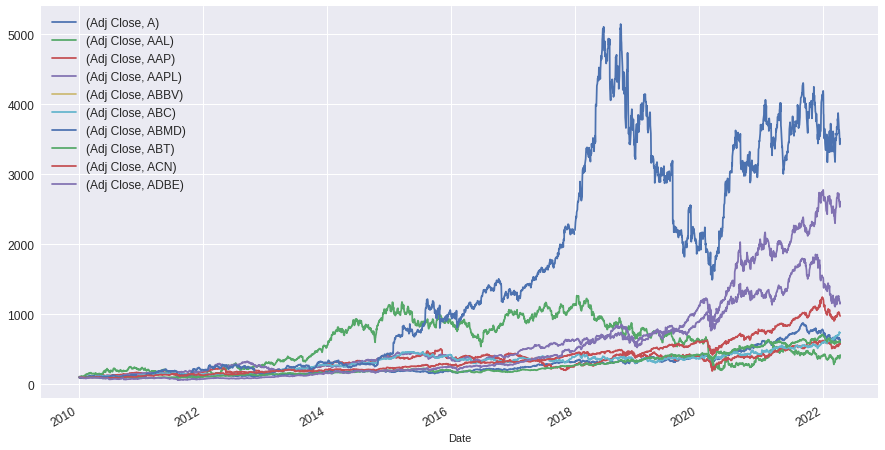

In [24]:
# Lets plot the normalized closed values
norm_close.plot(figsize = (15,8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [25]:
# Lets get the column for AAPL and play with it for Risk Return Analysis
# Later we will do it on whole data
aapl = stocks_ten.iloc[:, 3].copy().to_frame()

In [26]:
aapl

,Adj Close
,AAPL
Date,
2009-12-31,NaN
2010-01-04,6.544687
2010-01-05,6.556002
2010-01-06,6.451721
2010-01-07,6.439792
...,...
2022-04-07,172.139999
2022-04-08,170.089996


In [27]:
# Lets use shift function to make a new column
aapl.dropna()
#

,Adj Close
,AAPL
Date,
2010-01-04,6.544687
2010-01-05,6.556002
2010-01-06,6.451721
2010-01-07,6.439792
2010-01-08,6.482607
...,...
2022-04-07,172.139999
2022-04-08,170.089996


In [28]:
aapl['lag1'] = aapl.shift(periods = 1)

In [29]:
aapl

,Adj Close,lag1
,AAPL,
Date,,
2009-12-31,NaN,NaN
2010-01-04,6.544687,NaN
2010-01-05,6.556002,6.544687
2010-01-06,6.451721,6.556002
2010-01-07,6.439792,6.451721
...,...,...
2022-04-07,172.139999,171.830002
2022-04-08,170.089996,172.139999


In [30]:
# Inorder to find the percent change we need to find difference between first column and lag1 column
aapl['diff'] = aapl['Adj Close']['AAPL'] - aapl['lag1']

In [31]:
aapl

,Adj Close,lag1,diff
,AAPL,,
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,6.544687,NaN,NaN
2010-01-05,6.556002,6.544687,0.011315
2010-01-06,6.451721,6.556002,-0.104281
2010-01-07,6.439792,6.451721,-0.011929
...,...,...,...
2022-04-07,172.139999,171.830002,0.309998
2022-04-08,170.089996,172.139999,-2.050003


In [32]:
# Lets find the % change manually
aapl['% Change'] = ((aapl['Adj Close']['AAPL'] / aapl['lag1']) - 1) * 100

In [41]:
# % change can also be done using pct_change() method
aapl["% Change 2"] = aapl['Adj Close']['AAPL'].pct_change(periods = 1).mul(100)

In [42]:
aapl

,Adj Close,lag1,diff,% Change,% Change 2
,AAPL,,,,
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.544687,NaN,NaN,NaN,NaN
2010-01-05,6.556002,6.544687,0.011315,0.172886,0.172886
2010-01-06,6.451721,6.556002,-0.104281,-1.590625,-1.590625
2010-01-07,6.439792,6.451721,-0.011929,-0.184890,-0.184890
...,...,...,...,...,...
2022-04-07,172.139999,171.830002,0.309998,0.180409,0.180409
2022-04-08,170.089996,172.139999,-2.050003,-1.190893,-1.190893


In [53]:
aapl['% Change 2'] = aapl['AAPL'].pct_change().mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
aapl

,AAPL,% Change 2
Date,,
2009-12-31,NaN,NaN
2010-01-04,6.544687,NaN
2010-01-05,6.556002,0.172886
2010-01-06,6.451721,-1.590625
2010-01-07,6.439792,-0.184890
...,...,...
2022-04-07,172.139999,0.180409
2022-04-08,170.089996,-1.190893
2022-04-11,165.750000,-2.551588


In [55]:
# Lets rename the columns of the DataFrame
aapl.rename(columns = {'% Change 2':'Change'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
aapl

,AAPL,Change
Date,,
2009-12-31,NaN,NaN
2010-01-04,6.544687,NaN
2010-01-05,6.556002,0.172886
2010-01-06,6.451721,-1.590625
2010-01-07,6.439792,-0.184890
...,...,...
2022-04-07,172.139999,0.180409
2022-04-08,170.089996,-1.190893
2022-04-11,165.750000,-2.551588


In [57]:
# This is daily data but lets resample the data monthly so that we can get the average
aapl.AAPL.resample('M').last()

Date
2009-12-31           NaN
2010-01-31      5.873429
2010-02-28      6.257530
2010-03-31      7.186586
2010-04-30      7.984450
                 ...    
2021-12-31    177.344055
2022-01-31    174.557602
2022-02-28    165.119995
2022-03-31    174.610001
2022-04-30    170.891205
Freq: M, Name: AAPL, Length: 149, dtype: float64

In [58]:
# Last business day
aapl.AAPL.resample('BM').last()

Date
2009-12-31           NaN
2010-01-29      5.873429
2010-02-26      6.257530
2010-03-31      7.186586
2010-04-30      7.984450
                 ...    
2021-12-31    177.344055
2022-01-31    174.557602
2022-02-28    165.119995
2022-03-31    174.610001
2022-04-29    170.891205
Freq: BM, Name: AAPL, Length: 149, dtype: float64

In [60]:
# Lets find the pct_change of this Monthly data
aapl.AAPL.resample('BM').last().pct_change().mul(100)

Date
2009-12-31          NaN
2010-01-29          NaN
2010-02-26     6.539628
2010-03-31    14.847012
2010-04-30    11.102128
                ...    
2021-12-31     7.422862
2022-01-31    -1.571213
2022-02-28    -5.406586
2022-03-31     5.747339
2022-04-29    -2.129773
Freq: BM, Name: AAPL, Length: 149, dtype: float64

In [61]:
# Now Lets find out mean return and std
del aapl['Change']

In [64]:
returns = aapl.pct_change().dropna()

In [66]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3095 entries, 2010-01-05 to 2022-04-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3095 non-null   float64
dtypes: float64(1)
memory usage: 48.4 KB


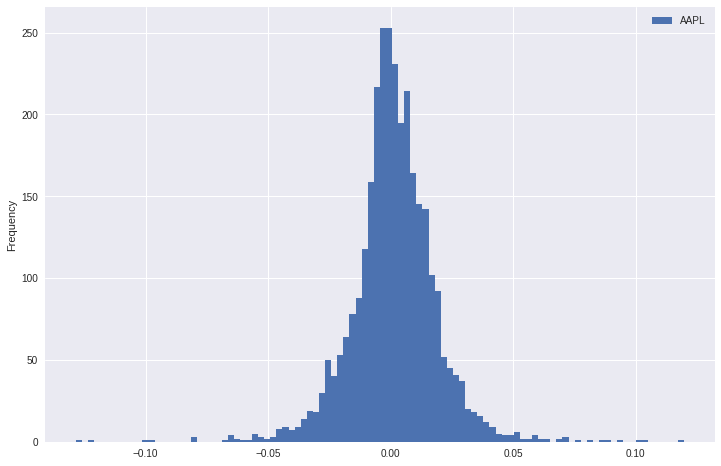

In [67]:
# Lets plot histogram plot
returns.plot(kind = 'hist', figsize = (12, 8), bins = 100)
plt.show()

In [68]:
returns.describe()

,AAPL
count,3095.000000
mean,0.001211
std,0.017684
min,-0.128647
25%,-0.007170
50%,0.000943
75%,0.010506
max,0.119808


In [70]:
daily_mean_returns = returns.mean()

In [71]:
var_daily = returns.var()

In [72]:
std_daily = returns.std()

In [74]:
# multiply the daily mean returns with the working days of the year(252) to get annual_mean_return
annual_mean_returns = daily_mean_returns * 252
annual_mean_returns

AAPL    0.305198
dtype: float64

In [75]:
annual_var_returns = var_daily * 252

In [78]:
annual_std_returns = std_daily * np.sqrt(252)
annual_std_returns

AAPL    0.280725
dtype: float64

In [108]:
# Lets get the data for more tickers
returns = stocks_ten.pct_change().dropna()

In [105]:
returns.head()

Adj Close                                                    \
                   A       AAL       AAP      AAPL      ABBV       ABC   
Date                                                                     
2013-01-03  0.003582 -0.022890  0.000000 -0.012622 -0.008257 -0.002070   
2013-01-04  0.019748  0.078331  0.015588 -0.027855 -0.012633  0.006682   
2013-01-07 -0.007233  0.007468 -0.003396 -0.005882  0.002035  0.003205   
2013-01-08 -0.007991  0.021563 -0.016355  0.002691 -0.021764 -0.001369   
2013-01-09  0.027008 -0.001979  0.003048 -0.015629  0.005636  0.000000   

                                                    
                ABMD       ABT       ACN      ADBE  
Date                                                
2013-01-03 -0.017531  0.038066 -0.003620 -0.015389  
2013-01-04 -0.002974 -0.006011  0.005522  0.010066  
2013-01-07 -0.011931  0.008165 -0.004336 -0.004983  
2013-01-08 -0.003019  0.000300  0.005806  0.005272  
2013-01-09 -0.028009  0.006596  0.007072  0.013634

In [109]:
# Drop the top level Adj. Close
returns = returns.droplevel(0, axis=1)

In [110]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
Date,,,,,,,,,,
2013-01-03,0.003582,-0.022890,0.000000,-0.012622,-0.008257,-0.002070,-0.017531,0.038066,-0.003620,-0.015389
2013-01-04,0.019748,0.078331,0.015588,-0.027855,-0.012633,0.006682,-0.002974,-0.006011,0.005522,0.010066
2013-01-07,-0.007233,0.007468,-0.003396,-0.005882,0.002035,0.003205,-0.011931,0.008165,-0.004336,-0.004983
2013-01-08,-0.007991,0.021563,-0.016355,0.002691,-0.021764,-0.001369,-0.003019,0.000300,0.005806,0.005272
2013-01-09,0.027008,-0.001979,0.003048,-0.015629,0.005636,0.000000,-0.028009,0.006596,0.007072,0.013634
...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.024263,-0.024741,0.022318,0.001804,0.025872,0.030226,0.011984,0.028598,0.004438,0.018882
2022-04-08,-0.007798,-0.021239,0.037503,-0.011909,0.009695,0.015468,-0.009417,-0.000973,-0.008339,-0.016301
2022-04-11,-0.026767,0.022905,-0.021131,-0.025516,-0.029321,-0.016864,-0.046959,-0.026045,-0.034374,-0.024476


In [111]:
returns.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,0.000779,0.000642,0.000693,0.001147,0.000959,0.000763,0.001708,0.000744,0.000841,0.001218
std,0.015615,0.031572,0.019897,0.017798,0.017288,0.016484,0.027379,0.014516,0.014509,0.019055
min,-0.110117,-0.252246,-0.203440,-0.128647,-0.162524,-0.130314,-0.285859,-0.097856,-0.102967,-0.147452
25%,-0.006775,-0.013694,-0.008168,-0.006929,-0.007253,-0.006583,-0.009830,-0.005928,-0.005533,-0.006928
50%,0.001201,0.000216,0.000392,0.000895,0.001408,0.001120,0.001659,0.000741,0.001324,0.001406
75%,0.009344,0.014956,0.009651,0.010258,0.009300,0.008826,0.014673,0.008330,0.007715,0.010228
max,0.098394,0.410970,0.165575,0.119808,0.137673,0.118151,0.292778,0.109360,0.128573,0.177193


In [112]:
# Transpose it
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2340.0,0.000779,0.015615,-0.110117,-0.006775,0.001201,0.009344,0.098394
AAL,2340.0,0.000642,0.031572,-0.252246,-0.013694,0.000216,0.014956,0.410970
AAP,2340.0,0.000693,0.019897,-0.203440,-0.008168,0.000392,0.009651,0.165575
AAPL,2340.0,0.001147,0.017798,-0.128647,-0.006929,0.000895,0.010258,0.119808
ABBV,2340.0,0.000959,0.017288,-0.162524,-0.007253,0.001408,0.009300,0.137673
ABC,2340.0,0.000763,0.016484,-0.130314,-0.006583,0.001120,0.008826,0.118151
ABMD,2340.0,0.001708,0.027379,-0.285859,-0.009830,0.001659,0.014673,0.292778
ABT,2340.0,0.000744,0.014516,-0.097856,-0.005928,0.000741,0.008330,0.109360
ACN,2340.0,0.000841,0.014509,-0.102967,-0.005533,0.001324,0.007715,0.128573
ADBE,2340.0,0.001218,0.019055,-0.147452,-0.006928,0.001406,0.010228,0.177193


In [115]:
# Lets extract the mean and std column from the returns DataFrame
risk_return = returns.describe().T.loc[:,["mean", "std"]]

In [116]:
risk_return

,mean,std
A,0.000779,0.015615
AAL,0.000642,0.031572
AAP,0.000693,0.019897
AAPL,0.001147,0.017798
ABBV,0.000959,0.017288
ABC,0.000763,0.016484
ABMD,0.001708,0.027379
ABT,0.000744,0.014516
ACN,0.000841,0.014509
ADBE,0.001218,0.019055


In [117]:
risk_return['mean'] = risk_return['mean'] * 252

In [118]:
risk_return

,mean,std
A,0.196367,0.015615
AAL,0.161795,0.031572
AAP,0.174628,0.019897
AAPL,0.289038,0.017798
ABBV,0.241580,0.017288
ABC,0.192233,0.016484
ABMD,0.430461,0.027379
ABT,0.187406,0.014516
ACN,0.212054,0.014509
ADBE,0.306903,0.019055


In [119]:
risk_return['std'] = risk_return['std'] * np.sqrt(252)

In [120]:
risk_return

,mean,std
A,0.196367,0.247887
AAL,0.161795,0.501194
AAP,0.174628,0.315854
AAPL,0.289038,0.282534
ABBV,0.241580,0.274441
ABC,0.192233,0.261672
ABMD,0.430461,0.434623
ABT,0.187406,0.230437
ACN,0.212054,0.230330
ADBE,0.306903,0.302491


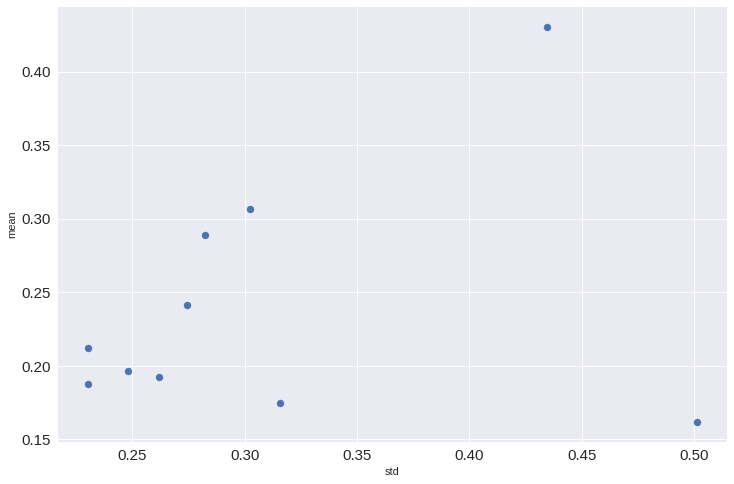

In [121]:
# Lets plot the risk return as a scatter plot, std would be on x-axis and mean would on y-axis
risk_return.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15)

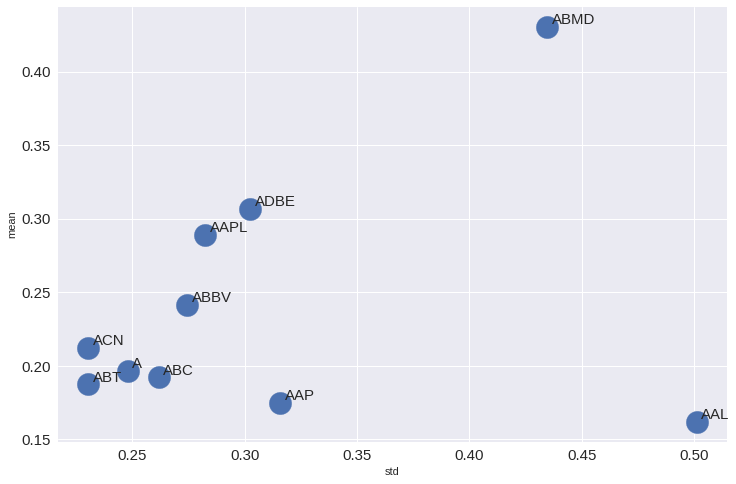

In [125]:
# Lets annotate the graph by representing which dot is which company
risk_return.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 500, fontsize = 15)
for i in risk_return.index:
  plt.annotate(i,xy = (risk_return.loc[i,"std"]+0.002, risk_return.loc[i,"mean"]+0.002), size = 15)